### Melanie Gradeler
### Delanie Dahm 
### BAIS:3025 Wrangling Analyzing Project Code
### Michael Colbert
## <center><ins>Analyzing Top 250 Movies Data<ins><center>
### <p style="text-align: right">_November 16th, 2024_

### This file would be the third file to run in order, if starting this project from the beginning or the first if using the scraped raw files submitted.
**Purpose:** This project involves scraping movie data from IMDb's Top 250 movies list, including details like titles, ratings, runtimes,
and additional information from individual movie pages. The cleaned data will be analyzed addressing our proposed research questions in the notebook below. You will find visualizations and markdown blocks detailing each question.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('2021_2024_List_Union.csv')

display(data.head(3))


,rank_2021,rank_2024,title,year,run_time,IMBD_rating_2021,IMBD_rating_2024,average_rating,genre,budget,box_office,popularity_score,metascore,oscars,url
0,1,1,the shawshank redemption,1994,142,9.3,9.3,9.3,Drama,25000000.0,2.888450e+07,62.0,82.0,NaN,https://www.imdb.com/title/tt0111161/?ref_=cht...
1,2,2,the godfather,1972,175,9.2,9.2,9.2,"Crime,Drama",6000000.0,2.503418e+08,57.0,100.0,3.0,https://www.imdb.com/title/tt0068646/?ref_=cht...
2,3,3,the dark knight,2008,152,9.0,9.0,9.0,"Action,Crime,Drama",185000000.0,1.006234e+09,101.0,84.0,2.0,https://www.imdb.com/title/tt0468569/?ref_=cht...


# <span style="color:skyblue">1 - Which movies maintained the same IMDB rank in 2024 and 2021? Of these movies, how much did their IMDB ratings change at all?</span>
**Explanation:**
We identified movies that held the same IMDb rank in both 2021 and 2024. For these movies, we compared their IMDb ratings across the two years. The results include the title, rank, IMDb ratings for 2021 and 2024, and creating an additional column to calculate the change in rating. This allows us to analyze which movies had consistent popularity and whether their quality perception changed over time.

In [16]:

# Filter movies with the same rank in 2021 and 2024
same_rank_movies = data[data['rank_2021'] == data['rank_2024']].copy()

# Analyze the change in IMDB ratings
same_rank_movies['rating_change'] = same_rank_movies['IMBD_rating_2024'] - same_rank_movies['IMBD_rating_2021']

# Display results
display(same_rank_movies.reset_index(drop=True)[['title', 'year', 'rank_2021', 'rank_2024', 'IMBD_rating_2021', 'IMBD_rating_2024', 'rating_change', 'popularity_score', 'metascore']])


,title,year,rank_2021,rank_2024,IMBD_rating_2021,IMBD_rating_2024,rating_change,popularity_score,metascore
0,the shawshank redemption,1994,1,1,9.3,9.3,0.0,62.0,82.0
1,the godfather,1972,2,2,9.2,9.2,0.0,57.0,100.0
2,the dark knight,2008,3,3,9.0,9.0,0.0,101.0,84.0
3,the godfather part ii,1974,4,4,9.0,9.0,0.0,185.0,90.0
4,12 angry men,1957,5,5,9.0,9.0,0.0,254.0,97.0
5,the lord of the rings: the fellowship of the ring,2001,9,9,8.8,8.9,0.1,105.0,92.0
6,pulp fiction,1994,8,8,8.9,8.9,0.0,137.0,95.0
7,inception,2010,14,14,8.8,8.8,0.0,126.0,74.0
8,forrest gump,1994,11,11,8.8,8.8,0.0,208.0,82.0
9,"the good, the bad and the ugly",1966,10,10,8.8,8.8,0.0,503.0,90.0


In [3]:
# Get the row(s) with the maximum value in 'rating_change'
max_change_row = same_rank_movies[same_rank_movies['rating_change'] == same_rank_movies['rating_change'].max()]

# Display the 'title' column of the resulting row(s)
print("There was one movie maintaining the same rank whose rating changed over time and increased by 0.1. It was:")
for title in max_change_row["title"]:
    print(f"- {title}")


There was one movie maintaining the same rank whose rating changed over time and increased by 0.1. It was:
- the lord of the rings: the fellowship of the ring


# <span style="color:skyblue">2 - Is there a correlation between metascore and number of Oscars? </span>
**Explanation:**
We explored the relationship between a movie's metascore and the number of Oscars it received. After cleaning the data to handle missing values, we calculated the correlation coefficient and found it to be 0.142. This value indicates a weak positive correlation between the Metascore and the number of Oscars. A scatter plot with a trendline visually represents the relationship and helps validate the correlation calculation.

In [4]:
# Drop rows with missing values in 'metascore' or 'oscars'
filtered_data_new = data.dropna(subset=['metascore', 'oscars'])

# Calculate the correlation between 'metascore' and 'oscars'
correlation_new = filtered_data_new['metascore'].corr(filtered_data_new['oscars'])

# Display the result
print(f"The correlation is {correlation_new:.3f}")

# Count the number of rows before and after dropping missing values
original_count = data.shape[0]
filtered_count = filtered_data_new.shape[0]

# Calculate the number of rows dropped
rows_dropped = original_count - filtered_count

# Display the result
print(f"Number of rows dropped: {rows_dropped}")
print(f"Number of rows used to calculate correlation: {filtered_count}")
print(f"Total rows: {original_count}")

The correlation is 0.142
Number of rows dropped: 113
Number of rows used to calculate correlation: 115
Total rows: 228


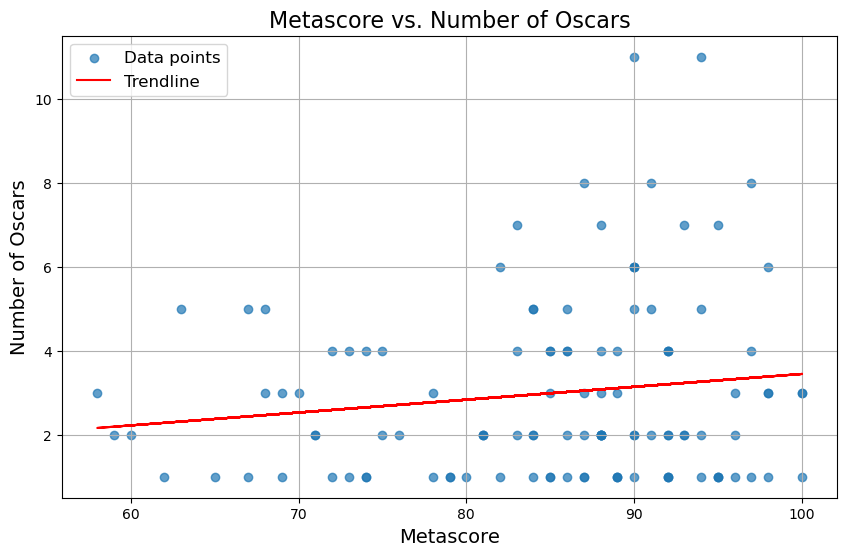

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_new['metascore'], filtered_data_new['oscars'], alpha=0.7, label="Data points")

# Calculate the trendline
z = np.polyfit(filtered_data_new['metascore'], filtered_data_new['oscars'], 1)  # 1 indicates a linear fit
p = np.poly1d(z)  # Create a polynomial from the coefficients

# Add the trendline to the plot
plt.plot(filtered_data_new['metascore'], p(filtered_data_new['metascore']), color='red', label="Trendline")

# Add labels, title, and legend
plt.title('Metascore vs. Number of Oscars', fontsize=16)
plt.xlabel('Metascore', fontsize=14)
plt.ylabel('Number of Oscars', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [18]:
# Filter movies with a metascore over 90 and oscars over 10
high_met_high_oscars = data[(data['metascore'] > 90) & (data['oscars'] > 10)]

# Display relevant information
if not high_met_high_oscars.empty:
    display(high_met_high_oscars[["title", "rank_2024","IMBD_rating_2024", "metascore", "oscars"]])
else:
    print("No movies meet the criteria of a metascore over 90 and oscars over 10")

,title,rank_2024,IMBD_rating_2024,metascore,oscars
5,the lord of the rings: the return of the king,6,9.0,94.0,11.0


# <span style="color:skyblue">3 - Which movies have the best scores across all three scoring methods (popularity score, metascore, rating)?</span>
**Explanation:**
The top movies across three metrics—popularity score, metascore, and IMDb rating—were identified. These scores provide a multi-dimensional perspective on movie quality, popularity, and critical acclaim. The analysis highlights movies that perform exceptionally well across all scoring methods. A low popularity score means the movie is more popular, and both a high metascore and rating determines good scores for those metrics.

In [6]:
min_pop = data['popularity_score'].min()
max_meta = data['metascore'].max()
max_rate = data['IMBD_rating_2024'].max()  # Higher rank = better

# Finding the rows corresponding to these values
best_meta_row = data[data['metascore'] == max_meta]
best_rate_row = data[data['IMBD_rating_2024'] == max_rate]
best_pop_row = data[data['popularity_score'] == min_pop]

# Printing details
print(f"The movies with the best metascore are:")
display(best_meta_row[['title', 'metascore']])
print("-"*75)
print(f"The movie with the best rating is:")
display(best_rate_row[['title', 'IMBD_rating_2024']])
print("-"*75)
print(f"The movie with the best popularity score is:")
display(best_pop_row[['title', 'popularity_score']])

The movies with the best metascore are:


,title,metascore
1,the godfather,100.0
46,casablanca,100.0
47,rear window,100.0
96,vertigo,100.0
97,citizen kane,100.0
219,tokyo story,100.0


---------------------------------------------------------------------------
The movie with the best rating is:


,title,IMBD_rating_2024
0,the shawshank redemption,9.3


---------------------------------------------------------------------------
The movie with the best popularity score is:


,title,popularity_score
31,gladiator,8.0


In [21]:
# Filter movies with a metascore over 90 and rating over 9 and popularity score under 100
high_scores= data[(data['metascore'] > 90) & (data['IMBD_rating_2024'] > 9)& (data['popularity_score'] < 100 )]

# Display relevant information
if not high_scores.empty:
    display(high_scores[["title", "rank_2024","IMBD_rating_2024", "metascore", "popularity_score"]])
else:
    print("No movies meet the criteria of a metascore over 90 and rating over 9 and popularity score under 100")

,title,rank_2024,IMBD_rating_2024,metascore,popularity_score
1,the godfather,2,9.2,100.0,57.0


# <span style="color:skyblue">4 - Is there a correlation between budget and box office revenue?</span>
## <span style="color:skyblue">Which movie had the highest box office revenue and what was its budget?</span>
**Explanation:**
We analyzed the relationship between production budget and box office revenue to understand whether higher budgets correlate with higher revenues. After cleaning the data to handle missing values, we calculated the correlation coefficient and found it to be 0.684. This value indicates a moderately strong positive correlation between the production budget and box office revenue. A scatter plot was created to visualize this relationship, complemented by a trendline for better interpretation. Additionally, we identified the movie with the highest box office revenue and reported its associated budget, offering insights into the financial scale of top-performing movies.


In [7]:
# Drop rows with null values in 'budget' or 'box_office'
cleaned_data = data.dropna(subset=['budget', 'box_office'])

# Prepare the data
x = cleaned_data['budget'].values.reshape(-1, 1)
y = cleaned_data['box_office'].values

# Calculate the correlation between 'metascore' and 'oscars'
correlation_b_r = cleaned_data['budget'].corr(cleaned_data['box_office'])

# Display the result
print(f"The correlation is {correlation_b_r:.3f}")

# Count the number of rows before and after dropping missing values
original_count = data.shape[0]
filtered_count = cleaned_data.shape[0]

# Calculate the number of rows dropped
rows_dropped = original_count - filtered_count

# Display the result
print(f"Number of rows dropped: {rows_dropped}")
print(f"Number of rows used to calculate correlation: {filtered_count}")
print(f"Total rows: {original_count}")

The correlation is 0.684
Number of rows dropped: 32
Number of rows used to calculate correlation: 196
Total rows: 228


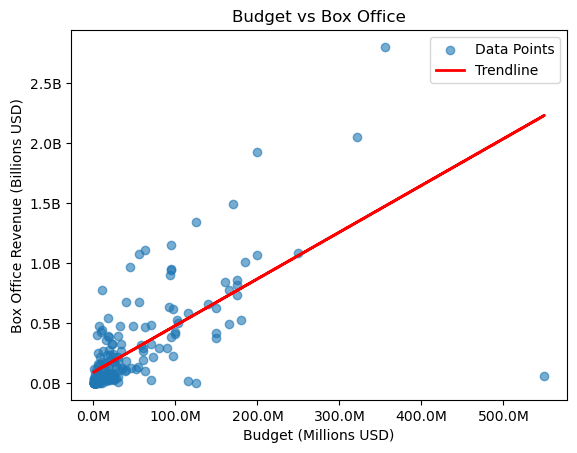

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Scatter plot with trendline
plt.scatter(cleaned_data['budget'], cleaned_data['box_office'], alpha=0.6, label='Data Points')
plt.plot(cleaned_data['budget'], y_pred, color='red', linewidth=2, label='Trendline')  # Add trendline

# Add title and labels
plt.title('Budget vs Box Office')
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Box Office Revenue (Billions USD)')

# Format axes
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e9:.1f}B'))

# Add legend
plt.legend()
plt.show()


In [22]:
# Filter movies with a budget over 300 million and box office revenue over 2.5 billion
high_budget_high_revenue_movies = data[(data['budget'] > 300_000_000) & (data['box_office'] > 2_500_000_000)]

# Display relevant information
if not high_budget_high_revenue_movies.empty:
    display(high_budget_high_revenue_movies[["title", "rank_2024","IMBD_rating_2024", "budget", "box_office"]])
else:
    print("No movies meet the criteria of a budget over $300 million and box office revenue over $2.5 billion.")

,title,rank_2024,IMBD_rating_2024,budget,box_office
53,avengers: endgame,78,8.4,356000000.0,2.799439e+09


In [24]:
# Filter movies with a budget over 500 million and box office revenue under 1 billion
high_budget_high_revenue_movies = data[(data['budget'] > 500_000_000) & (data['box_office'] < 2_500_000_000)]

# Display relevant information
if not high_budget_high_revenue_movies.empty:
    display(high_budget_high_revenue_movies[["title", "rank_2024", "IMBD_rating_2024", "budget", "box_office"]])
else:
    print("No movies meet the criteria of a budget over $500 million and box office revenue under 1 billion.")

,title,rank_2024,IMBD_rating_2024,budget,box_office
68,3 idiots,86,8.4,550000000.0,60262836.0


# <span style="color:skyblue">5 - Which genre was the most profitable overall?</span>
**Explanation:**
This analysis explores the distribution of IMDb ratings across different movie genres. By grouping movies by genre and calculating the average IMDb rating for each, we identified which genres tend to have the highest ratings. A bar chart or similar visualization is used to compare the average ratings of genres, providing insights into which genres are most critically acclaimed. This information can help highlight trends in audience and critical reception by genre.


In [11]:
# Ensure no missing values in budget and box_office for profit calculation
data = data.dropna(subset=['budget', 'box_office'])

# Calculate profit
data['profit'] = data['box_office'] - data['budget']

# Split genres into individual rows for grouping
genres_split = data.assign(genre=data['genre'].str.split(',')).explode('genre')

# Group by individual genres and calculate total profit
genre_profit = genres_split.groupby('genre')['profit'].sum().sort_values(ascending=False)

# Get the most profitable genre and its profit
most_profitable_genre, most_profitable_profit = genre_profit.index[0], genre_profit.iloc[0]

# Display the most profitable genre
print(f"\nThe most profitable genre is '{most_profitable_genre}' with a total profit of ${most_profitable_profit:,.1f}.")


The most profitable genre is 'Adventure' with a total profit of $24,667,296,044.0.


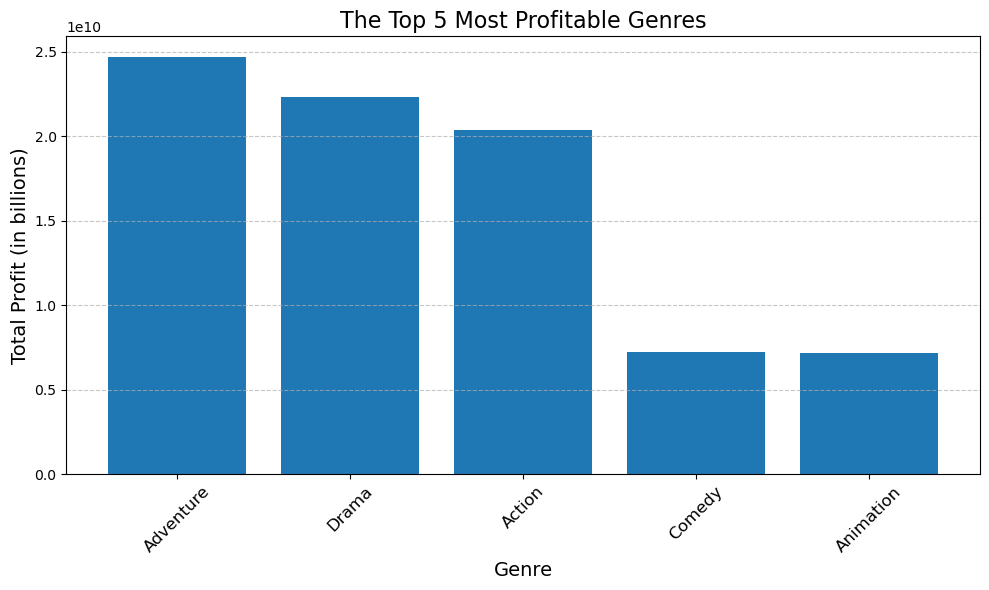

In [12]:
# Get the top 5 genres by profitability
top_5_genres = genre_profit.sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_genres.index, top_5_genres.values)
plt.title("The Top 5 Most Profitable Genres", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Profit (in billions)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()